In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('/content/loan_approval_dataset.csv')
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.columns = df.columns.str.strip()

X = df.drop('loan_status', axis=1)
y = df['loan_status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

# Evaluate
print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

=== Logistic Regression ===
[[485  46]
 [116 207]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       531
           1       0.82      0.64      0.72       323

    accuracy                           0.81       854
   macro avg       0.81      0.78      0.79       854
weighted avg       0.81      0.81      0.80       854



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Predict
y_pred_tree = tree.predict(X_test)

# Evaluate
print("=== Decision Tree ===")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

=== Decision Tree ===
[[525   6]
 [ 14 309]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       531
           1       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



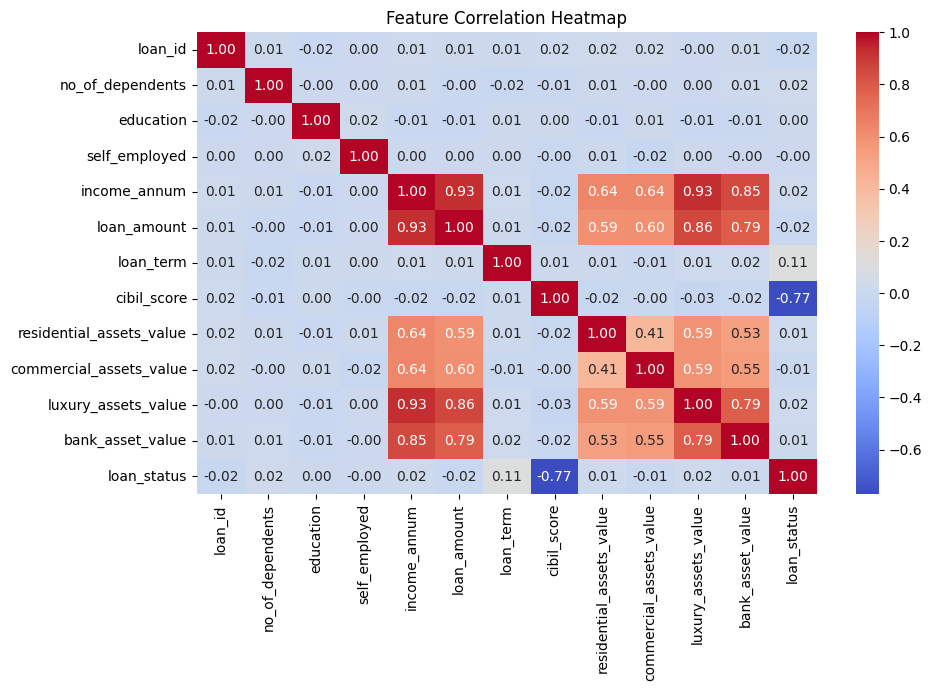

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


/tmp/ipython-input-799864742.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


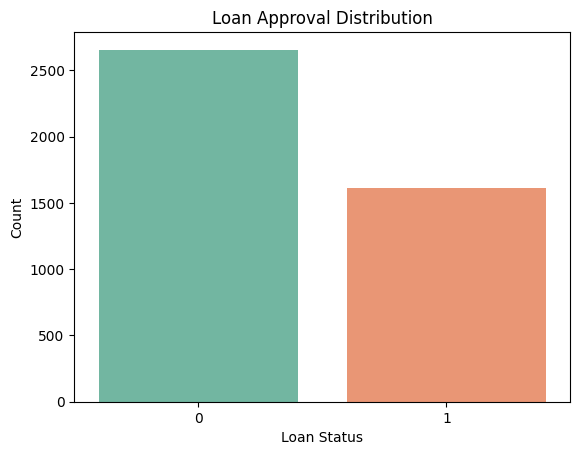

In [ ]:
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

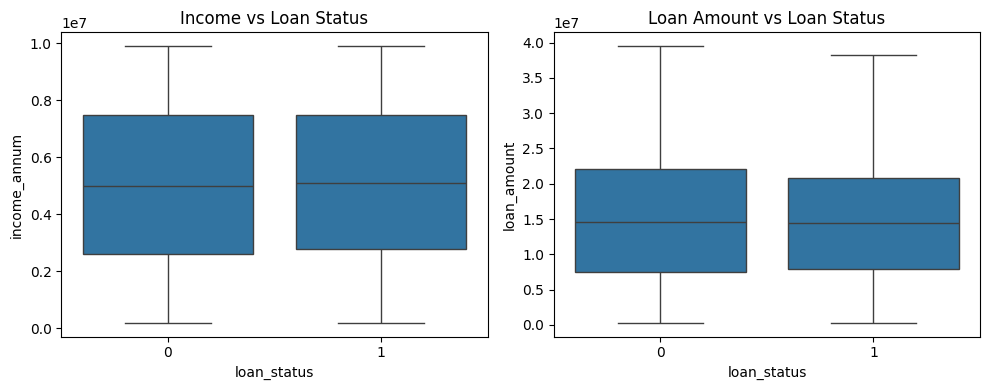

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.boxplot(x='loan_status', y='income_annum', data=df, ax=axes[0])
sns.boxplot(x='loan_status', y='loan_amount', data=df, ax=axes[1])
axes[0].set_title('Income vs Loan Status')
axes[1].set_title('Loan Amount vs Loan Status')
plt.tight_layout()
plt.show()

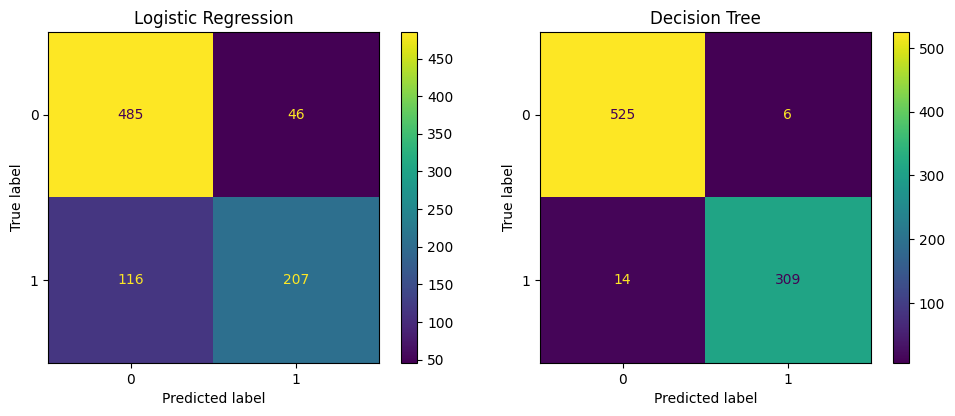

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(10,4))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax[0])
ax[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, ax=ax[1])
ax[1].set_title("Decision Tree")

plt.tight_layout()
plt.show()


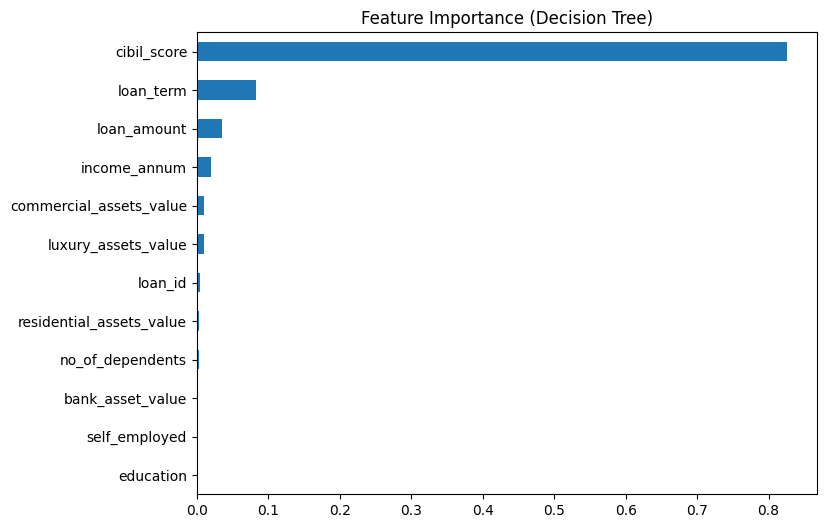

In [ ]:
import pandas as pd
feat_imp = pd.Series(tree.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,6), title='Feature Importance (Decision Tree)')
plt.show()
